In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon2021/sample_submission.csv
/kaggle/input/hackathon2021/train.csv/train.csv
/kaggle/input/hackathon2021/test.csv/test.csv


In [2]:
#loading datasets
train = pd.read_csv("/kaggle/input/hackathon2021/train.csv/train.csv")
test = pd.read_csv("/kaggle/input/hackathon2021/test.csv/test.csv")

In [3]:
train_labels = train['label']
train_pixels = train.drop(columns = "label", axis = 1)
test_pixels = test

In [4]:
train_pixels.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#normalizing pixel values of test and train set to 0-1
train_pixels, test_pixels = train_pixels / 255.0, test_pixels / 255.0

In [6]:
train_pixels.head(5)#after normalizing

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


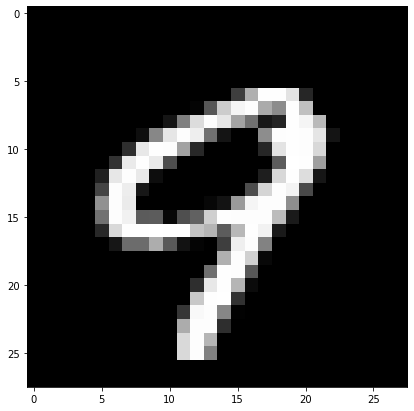

In [7]:
#image of imageid = 100 in train set
plt.figure(figsize = (7,7))
grid_data = np.array(train_pixels.iloc[100]).reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap = "gray")

In [8]:
#as cnn takse input of an image with size of height,width,color channels lets resize the train_pixels and test_pixels
train_p = train_pixels.values.reshape(train_pixels.shape[0],28,28,1)
test_p = test_pixels.values.reshape(test_pixels.shape[0],28,28,1)


In [9]:
train_p.shape

(42000, 28, 28, 1)

In [10]:
#Building Sequential Convolutional Neural Network with 3 convolutional neural network layers and 2 fully connected neural network layers
model = models.Sequential()
#adding layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_p, train_labels, epochs=10, 
                    validation_data=(train_p[:100], train_labels[:100]))

Epoch 1/10
1313/1313 [==============================] - 35s 26ms/step - loss: 0.3725 - accuracy: 0.8801 - val_loss: 0.0386 - val_accuracy: 0.9900
Epoch 2/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0873 - val_accuracy: 0.9900
Epoch 3/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0290 - val_accuracy: 0.9800
Epoch 4/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0318 - val_accuracy: 0.9900
Epoch 5/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0088 -

In [12]:
#predicting testset
sub = model.predict(test_p)

4


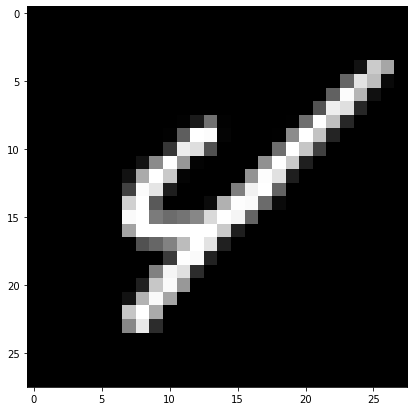

In [13]:
#testing for one image
plt.figure(figsize = (7,7))
grid_data = np.array(test_pixels.iloc[150]).reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap = "gray")
print(np.argmax(sub[150])) #because we've got the predictions in a ndimensional numpy array and we'll display the max value 